#                                    Progress Report - Crime Pricers

## Project introduction: an introduction that discusses the data you are analyzing, and the question or questions you are investigating.

 - We are trying to predict house prices in Chicago based on Chicago Crime and Real estate data.
 - We are analyzing Chicago crime and real estate dataset, as well as Chicago geojson data to project data on map
 - Does house prices change with respect crime? If yes, does it increase or decrese?
 - Does certain type of crime have higher impact on house prices?


## Any changes: a discussion whether your scope has changed since the check-inproposal slides. What did you aim to do that you will not do and what have you added to the project?

- No changes to scope. We still aim to create a model on predicting house price (price per squared foot) based on crime in the neighborhood. And we'll have an interactive map application to project crime, price for each neighborhood in Chicago

## Data cleaning: show clearly how you cleaned your data.

### Real estate Data
- The real estate data we got from RedFin is a projected price per squared foot for Chicago's neighborhoods from Feb 2012 up to current
- The geojson file of Chicago's neighborhood boundary we got from Chicago Data Portal
- The real estate data's neighborhood name and the geojson does not fit together. We have to manually map them.
- Then we created a data frame from the mapped neighborhoods and their prices through time

### Crime Data
- Crime Data had many unpopulated columns that had to do with location (lat/lon) and coordinates as well as description
that were no importatnt to the visualizations or model. These columns were dropped
- The reduction in size made the already very large file much smaller. We aimed to use feather to compress data further
- Compressed data is created by user using feather or by Dash CrimeApp when supplied a csv as an arguement

## Exploratory data analysis: explain what your data looks like (words are fine, but visualizations are often better). Include any interesting issues or preliminary conclusions you have about your data
 
### Crime Data: 
- Granularity: Each row represent 1 crime reported to the police.
- Scope: List of crimes recorded in Chicago and its all districts from 2014 - 2018
- Temporality: There are timestamps for recorded incidents and dataset begins with chronological order of date.
- Faithfulness: Police Departments intention are to be transparent about crime and the reporting of the incidents due to their work to provide law enforcement to seek justice. Some neighborhoods may report more crimes than other, regardless of their seriousness, which may result in biased data

### Real Estate Data:
- Granularity: Each row represents 1 neighborhood in Chicago.
- Scope: Not all neighborhoods are listed: 84 among 98 neighborhoods (from Chicago geojson file). Columns represent price in 1 month
- Temporality: Price listed for each month from Feb 2012 to current.
- Faithfulness: Prices are calculated based on listed price. Some neighborhoods are quite large, therefore the average price will not tell the truth about that area

In [4]:
import json

with open('chiNeighborhood.geojson') as f:
    geo = f.read()
    geojson = json.loads(geo)
    
import numpy as np

longs = []
lats = []
for k in range(len(geojson['features'])):
    neighborhood_coords = np.array(geojson['features'][k]['geometry']['coordinates'][0][0])
    m, M = neighborhood_coords[:, 0].min(), neighborhood_coords[:, 0].max()
    longs.append(0.5 * (m + M))
    m, M = neighborhood_coords[:, 1].min(), neighborhood_coords[:, 1].max()
    lats.append(0.5 * (m + M))
    
names = [geojson['features'][k]['properties']['pri_neigh'] for k in range(len(geojson['features']))]

import plotly.plotly as py
import plotly.graph_objs as graph_objs

mapbox_access_token = "pk.eyJ1IjoiamFja3AiLCJhIjoidGpzN0lXVSJ9.7YK6eRwUNFwd3ODZff6JvA"

data = graph_objs.Data([
    graph_objs.Scattermapbox(
        lat=lats,
        lon=longs,
        mode='markers',
        text=names,
        marker=dict(size=5, color='rgb(0,0,255)'),
        hoverinfo='text'
    )
])
layout = graph_objs.Layout(
    height=600,
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        layers=[
            dict(
                sourcetype = 'geojson',
                source = geojson,
                type = 'fill',
                color = 'rgba(163,22,19,0.2)'
            )
        ],
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=41.845,
            lon=-87.6231
        ),
        pitch=0,
        zoom=9,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='county-level-choropleths-python')

/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jemiar/0 or inside your plot.ly account where it is named 'county-level-choropleths-python'


/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



##### At least one visualization that tests an interesting hypothesis, along with an explanation about why you thought this was an interesting hypothesis to investigate. 
-When iterating through crime years for respective neightborhoods you can see how crime affects prices or when neighborhoods were relatively mnore dangerous than other years

In [10]:
# imports
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import matplotlib.pyplot as plt
%matplotlib inline  
import feather
import os
import time
import calendar

plotly.tools.set_credentials_file(username='clazca2', api_key='jpSlGELzcICDEwXXsdeH')

# data
house_df = feather.read_dataframe('houseData.feather')
crime_df = feather.read_dataframe('crimeData.feather')


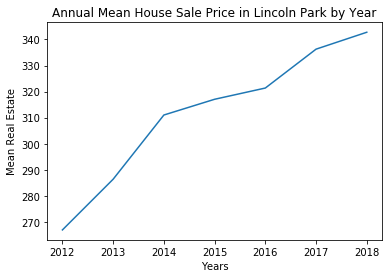

In [8]:
# Lincoln Park Line graph over years for real estate
df = house_df[house_df.area == 'Lincoln Park']

year = list(range(2012,2019))
means = [ df.iloc[0,0],df.iloc[0,1],df.iloc[0,2],df.iloc[0,3],df.iloc[0,4],df.iloc[0,5],df.iloc[0,6] ]

plt.plot(year, means)
plt.xlabel('Years')
plt.ylabel('Mean Real Estate')
plt.title('Annual Mean House Sale Price in Lincoln Park by Year')
plt.show()

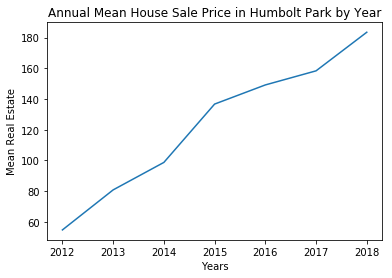

In [9]:
# Lincoln Park Line graph over years for real estate
df = house_df[house_df.community_code == 23.0] # Humbolt Park

year = list(range(2012,2019))
means = [ df.iloc[0,0],df.iloc[0,1],df.iloc[0,2],df.iloc[0,3],df.iloc[0,4],df.iloc[0,5],df.iloc[0,6] ]

plt.plot(year, means)
plt.xlabel('Years')
plt.ylabel('Mean Real Estate')
plt.title('Annual Mean House Sale Price in Humbolt Park by Year')
plt.show()

In [11]:
def LP_CrimeBarPlot_byYear(year):
    # Lincoln Park Crime Analysis , explore years by changing year_df year predicate and compare to real estate
    selected_crimes = ['ASSAULT','BURGLARY','ROBBERY','MOTOR VEHICLE THEFT','HOMICIDE'] 
    labels = ['ASSAULT','BURGLARY','ROBBERY','VEHICLE THEFT','HOMICIDE'] 

    year_df = crime_df[crime_df.year == year]
    year_df = year_df[year_df.community_area == 7.0]

    x = selected_crimes
    y = []
    for i in selected_crimes:
        crimesCommited = len(year_df[year_df.primary_type == i])
        y.append( crimesCommited )

    plt.figure(figsize=(12, 8))
    freq_series = pd.Series(y)
    ax = freq_series.plot(kind='bar')
    ax.set_xticklabels(labels)
    ax.set_title('Lincoln Park Crime by Types - 2018')
    ax.set_xlabel('Crime Type')
    ax.set_ylabel('Frequency')

In [12]:
def HP_CrimeBarPlot_byYear(year):
    # Humbolt Park Crime Analysis , explore years by changing year_df year predicate and compare to real estate
    selected_crimes = ['ASSAULT','BURGLARY','ROBBERY','MOTOR VEHICLE THEFT','HOMICIDE'] 
    labels = ['ASSAULT','BURGLARY','ROBBERY','VEHICLE THEFT','HOMICIDE'] 

    year_df = crime_df[crime_df.year == year]
    year_df = year_df[year_df.community_area == 23.0]

    x = selected_crimes
    y = []
    for i in selected_crimes:
        crimesCommited = len(year_df[year_df.primary_type == i])
        y.append( crimesCommited )

    plt.figure(figsize=(12, 8))
    freq_series = pd.Series(y)
    ax = freq_series.plot(kind='bar')
    ax.set_xticklabels(labels)
    ax.set_title('Humbolt Park Crime by Types - 2018')
    ax.set_xlabel('Crime Type')
    ax.set_ylabel('Frequency')

In [ ]:
Test visualizations below

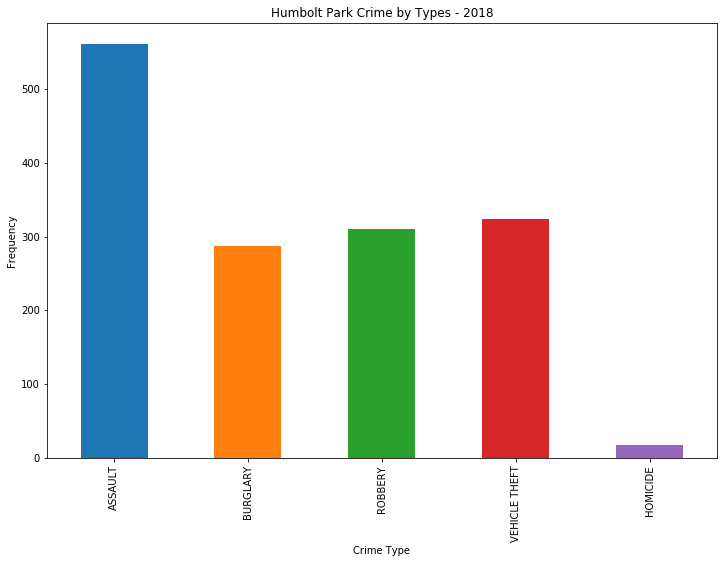

In [14]:
# Test out for Humbolt Park from eyars 2012-2018
HP_CrimeBarPlot_byYear(2015)

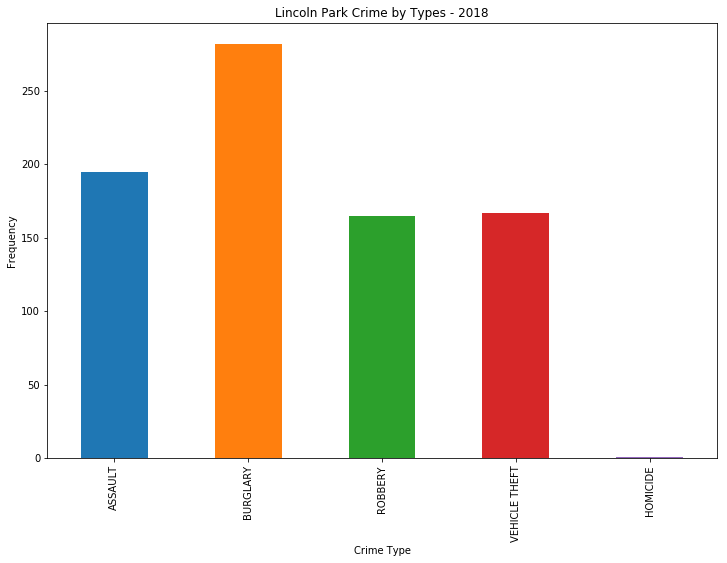

In [15]:
# Test out for Humbolt Park from eyars 2012-2018
LP_CrimeBarPlot_byYear(2018)

## At least one ML analysis on your dataset, along with a baseline comparison and an interpretation of the result that you obtain

## Reflection: a discussion of the following:
1. What is hardest part of the project that you’ve encountered so far?
  - Finding a way to combine crime and realestate datasets to run ML model. Mapping data between multiple datasets is quite hard.
2. What are your initial insights?
  - We haven't been able to achieve any insights just yet.
3. Are there any concrete results you can show at this point? If not, why not?
  - Interactive application to display result is up and running. 
4. Going forward, what are the current biggest problems you’re facing?
  - Feeding ML model results through interactive application. 
5. Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
  - We aim to map the data soon, we think we're going to be on track.
6. Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?
  - We'll try to map the data and then see how they look.


## Next steps: What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.

- We planned to run various ML models with combined crime and real estate data set and evaluate the results through test set.
- Intergrated generated results into interactive application and rigourously test it. 